In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
#from scipy import signal
from scipy.optimize import curve_fit
from scipy.io.wavfile import read, write
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 
import sounddevice as sd
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [11]:
#tmp_ = read('record/voice_test.wav')
tmp_ = read('../tutorial1/new_fan_record.wav')
signal = np.array(tmp_[1],dtype=np.float32)
N = 10000

(960000,)


Text(0, 0.5, 'Fourier Amplitude')

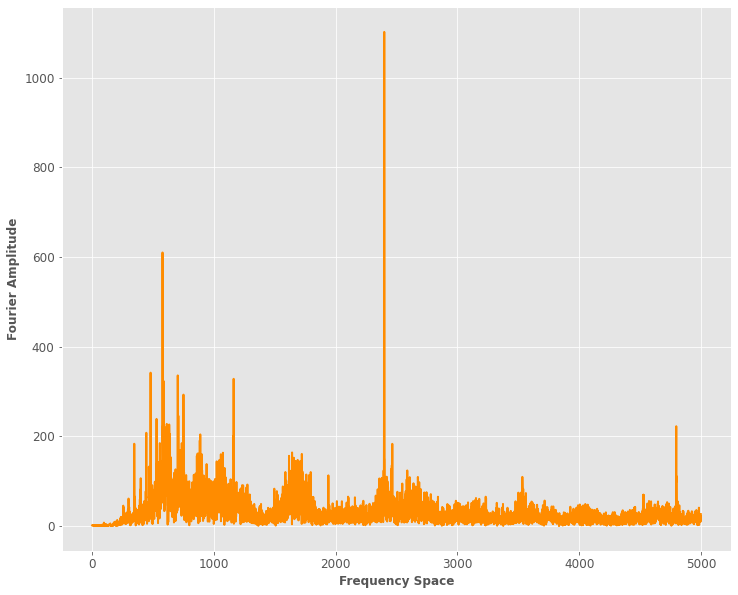

In [12]:
#signal = reg.predict(X)-y
#signal = signal-signal.mean()
print(signal.shape)
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(N/2.)],color='darkorange')
plt.xlabel('Frequency Space')
plt.ylabel('Fourier Amplitude')

In [13]:
new_Xph = [0 for x in range(1300)]
print(len(new_Xph))
def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(N/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    print(th)
    fft = np.fft.fft(signal)
    print(fft)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(N/2.)]

1300


0.09
0.0
[1.51452491+0.j         1.28887603+0.69411942j 1.29164484-0.16739163j ...
 1.02835064+0.08950841j 1.29164484+0.16739163j 1.28887603-0.69411942j]
[0.00233004 0.00225215 0.00200376 ... 0.02288216 0.02570977 0.04106795]
0.03
[1.51452491+0.j         1.28887603+0.69411942j 1.29164484-0.16739163j ...
 1.02835064+0.08950841j 1.29164484+0.16739163j 1.28887603-0.69411942j]
[0.         0.         0.         ... 0.         0.         0.04106795]
0.06
[1.51452491+0.j         1.28887603+0.69411942j 1.29164484-0.16739163j ...
 1.02835064+0.08950841j 1.29164484+0.16739163j 1.28887603-0.69411942j]
[0. 0. 0. ... 0. 0. 0.]
0.09
[1.51452491+0.j         1.28887603+0.69411942j 1.29164484-0.16739163j ...
 1.02835064+0.08950841j 1.29164484+0.16739163j 1.28887603-0.69411942j]
[0. 0. 0. ... 0. 0. 0.]


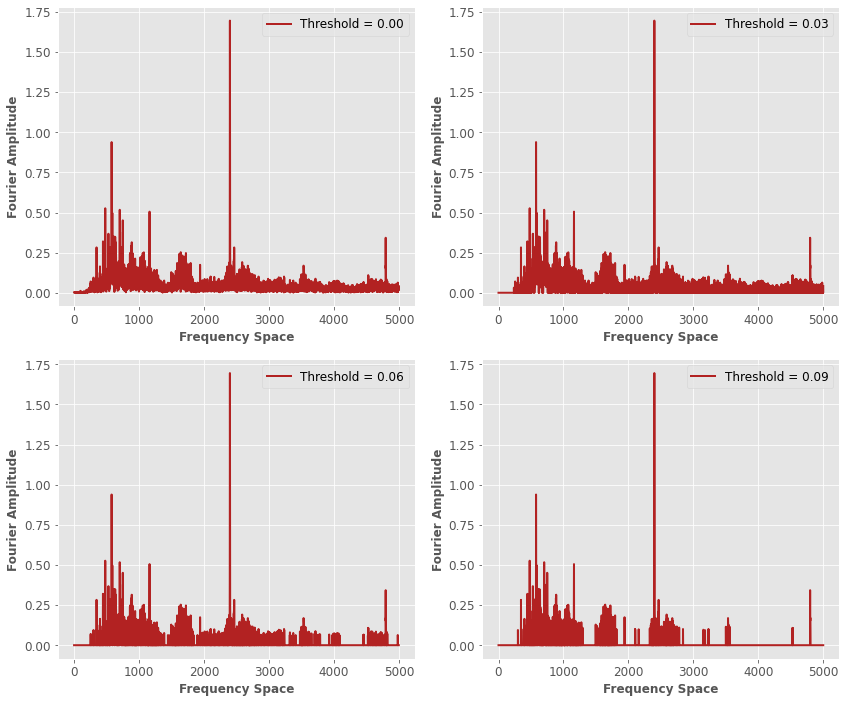

In [14]:
#th_list = np.linspace(0,1,5)
th_list = np.arange(0.,0.13,0.03)
print(th_list[3].round(2))
th_list = th_list[0:len(th_list)-1]
#for i,threshold in enumerate(np.arange(0.,0.12,0.03)):
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    
    th_filter = fft_filter_amp(th_i)
    print(th_filter)
    plt.plot(th_filter[0:int(N/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

/var/folders/sm/d_q8x2gx3c98vr5d1ws4g6g80000gn/T/ipykernel_6120/1848247138.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


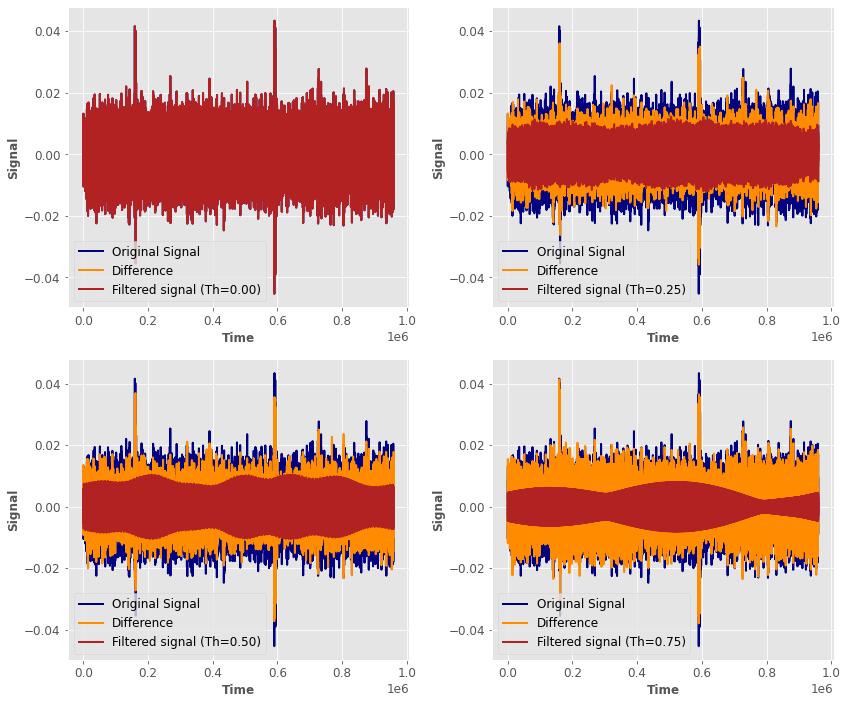

In [15]:
th_example_value = 0.05
#for i,threshold in enumerate(np.arange(0.,0.12,0.03)):
for i,threshold in enumerate(np.arange(0.,1,0.25)):
    plt.subplot(2,2,i+1)
    example_signal = filter_signal(threshold)
    plt.plot(signal,color='navy',label='Original Signal')
    plt.plot(signal-example_signal,color='darkorange',label='Difference')
    plt.plot(example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(threshold))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

In [16]:
fs = 48000
for threshold in np.arange(0.,0.12,0.03):
    print(threshold)
    example_signal = filter_signal(threshold)
    #write('./output/filter_'+str(threshold)+'.wav', fs, example_signal)  # Save as WAV file
    write('./output_only_fan/filter'+str(threshold)+'.wav', fs, example_signal)

0.0
0.03
0.06
0.09


In [17]:
'''second = 20
myrecording = None
myrecording = sd.rec(int(second * fs),samplerate=fs,channels = 1)
sd.wait()
write('record/voice_test.wav',fs,myrecording)'''

"second = 20\nmyrecording = None\nmyrecording = sd.rec(int(second * fs),samplerate=fs,channels = 1)\nsd.wait()\nwrite('record/voice_test.wav',fs,myrecording)"

In [18]:
myrecording = None
print(myrecording)

None
